## IMPORT LIBRARY

In [859]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## IMPORT CSV FILE

In [860]:
df = pd.read_csv('iris.csv',header=None)

## DATA PREPARATION

In [861]:
df.columns = ['x1','x2','x3','x4','type']

In [862]:
df2 = pd.DataFrame()
for i in range(50) :
    df2 = df2.append(df.iloc[i],ignore_index=True)
    df2 = df2.append(df.iloc[50+i],ignore_index=True)
    df2 = df2.append(df.iloc[100+i],ignore_index=True)

In [863]:
def strTypetoEnc1(type) :
    if (type=='Iris-setosa' or type=='Iris-versicolor') : return 0
    elif (type=='Iris-virginica') : return 1
def strTypetoEnc2(type) :
    if (type=='Iris-setosa' or type=='Iris-virginica') : return 0
    elif (type=='Iris-versicolor') : return 1
df2['type(num)1'] = df2['type'].apply(strTypetoEnc1)
df2['type(num)2'] = df2['type'].apply(strTypetoEnc2)
df2.head()

,type,x1,x2,x3,x4,type(num)1,type(num)2
0,Iris-setosa,5.1,3.5,1.4,0.2,0,0
1,Iris-versicolor,7.0,3.2,4.7,1.4,0,1
2,Iris-virginica,6.3,3.3,6.0,2.5,1,0
3,Iris-setosa,4.9,3.0,1.4,0.2,0,0
4,Iris-versicolor,6.4,3.2,4.5,1.5,0,1


## Inisialisasi bobot dan bias

In [864]:
def initialize_parameters(inn, hidlay, outt):
    
    np.random.seed(2)
    W1 = (np.random.randn(hidlay, inn) * 0.01).T
    b1 = (np.zeros(shape=(hidlay, 1))).T 
    W2 = (np.random.randn(outt, hidlay) * 0.01 ).T
    b2 = (np.zeros(shape=(outt, 1))).T
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

## Fungsi Aktivasi

In [865]:
def sigmoid(inn) :
    return 1/(1+np.exp(-inn))

## Forward_Propagation(Menghitung nilai prediksi)

In [997]:
def forward_propagation(X, parameters):
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Oin = np.dot(X, W1) + b1
    Oout = sigmoid(Oin)
    Yin = np.dot(Oout, W2) + b2
    Yout = sigmoid(Yin)
    cache = {'Oout' : Oout,
             'Oin' : Oin,
             'Yout' : Yout,
             'Yin' : Yin}
    return Yout, cache

## Cartesian Product

In [867]:
def cartesian_prod(a,b) :
    res = np.zeros((a.shape[0],b.shape[1]))
    for i in range(len(res)) :
        res[i] = a[i]*b
    return res

## Menghitung Nilai Loss

In [955]:
def Loss(Y,pred) :
    lossTot = np.multiply((pred-Y),(pred-Y))/2
    lossTot = np.sum(lossTot)
    return lossTot

In [869]:
lossTot = Loss(Y,out2)

## Backward Propagation (Mengitung gradient Descent)

In [992]:
def backward_propagation(cache,X,Y, parameters,pred):
    out1 = cache['Oout']
    out2 = cache['Yout']
    dbias2 = np.multiply((pred-Y),np.multiply(out2,(1-out2)))
    dW2 = cartesian_prod(out1.T,dbias2)
    dbias1 = np.multiply(np.multiply(out1,(1-out1)),np.array([np.sum(parameters['W2']*dbias2,axis=1)]))
    dW1 = cartesian_prod(X.T,dbias1)
    grads = {'dW2' : dW2,
             'dW1' : dW1,
             'dbias2' : dbias2,
             'dbias1' : dbias1}
    return grads

## Mengecek Kebenaran Prediksi

In [993]:
def check_pred(pred,Y) :
    pred1 = 0
    pred2 = 0
    if (pred[0][0]>0.5) : 
        pred1 = 1
    if (pred[0][1] > 0.5) :
        pred2 = 1
    #print(pred[0][0],Y[0][0],Y[0][1],pred[0][1])
    return (Y[0][0]==pred1 and Y[0][1]==pred2)

## Update Bobot dan bias

In [994]:
def update_parameters(parameters, grads, learning_rate=0.1):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['dbias1']
    dW2 = grads['dW2']
    db2 = grads['dbias2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Main Program

In [998]:
def model(num_iterations=150,split = 0.2, hidLay = 3,lR=0.1):
    ErrorTraining = []
    ErrorValidation = []
    AccuracyTraining = []
    AccuracyValidation = []
    parameters = initialize_parameters(4, hidLay, 2)
    train = int(150*(1-split))
    for j in range(0,num_iterations) :
        Acc = 0
        Error = []
        for i in range(0,train) : 
            X = df2.iloc[i:i+1,1:5].values
            Y = df2.iloc[i:i+1,5:7].values        
            pred,cache = forward_propagation(X, parameters)
            Error.append(Loss(Y,pred))
            if (check_pred(pred,Y)==True) :
                Acc = Acc + 1
            grads = backward_propagation(cache,X,Y, parameters,pred)
            parameters = update_parameters(parameters, grads, lR)
        ErrorTraining.append(sum(Error)/len(Error))
        AccuracyTraining.append(Acc/train)
        Acc = 0
        Error = []
        for j in range(train,150) :
            X = df2.iloc[i:i+1,1:5].values
            Y = df2.iloc[i:i+1,5:7].values        
            pred,cache = forward_propagation(X, parameters)
            Error.append(Loss(Y,pred))
            if (check_pred(pred,Y)==True) :
                Acc = Acc + 1
        ErrorValidation.append(sum(Error)/len(Error))
        AccuracyValidation.append(Acc/(150*split))
            
    return ErrorTraining,AccuracyTraining,ErrorValidation,AccuracyValidation

## Running Model (Learning_rate = 0.1)

In [999]:
ErrorTraining,AccuracyTraining,ErrorValidation,AccuracyValidation = model()

## Grafik Hasil

In [942]:
plt.style.use('ggplot')

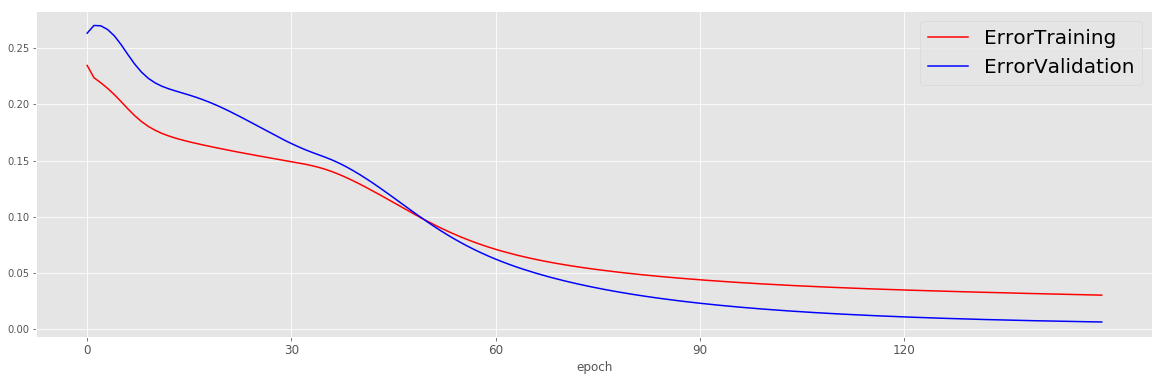

In [967]:
plt.figure(figsize = (20, 6))
plt.plot(ErrorTraining,'r', label = 'ErrorTraining')
plt.plot(ErrorValidation,'b',label = 'ErrorValidation')
plt.xticks(range(0, 150,30), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()

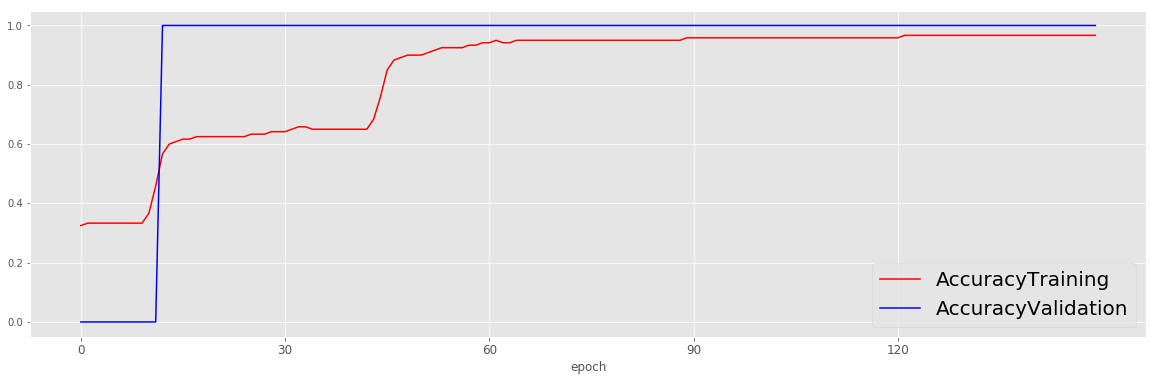

In [970]:
plt.figure(figsize = (20, 6))
plt.plot(AccuracyTraining,'r', label = 'AccuracyTraining')
plt.plot(AccuracyValidation,'b',label = 'AccuracyValidation')
plt.xticks(range(0, 150,30), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()

## Running Model (Learning_Rate = 0.8)

In [975]:
ErrorTraining,AccuracyTraining,ErrorValidation,AccuracyValidation = model(lR=0.8)

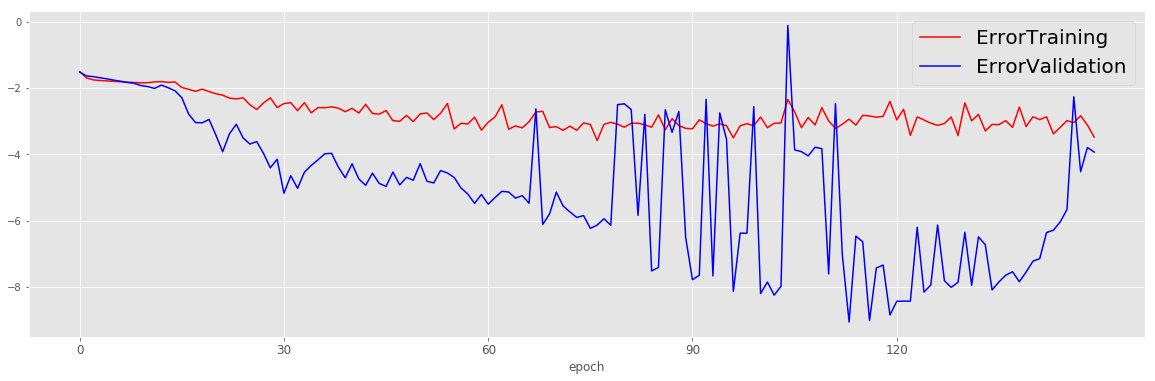

In [977]:
plt.figure(figsize = (20, 6))
plt.plot(np.log(ErrorTraining),'r', label = 'ErrorTraining')
plt.plot(np.log(ErrorValidation),'b',label = 'ErrorValidation')
plt.xticks(range(0, 150,30), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()

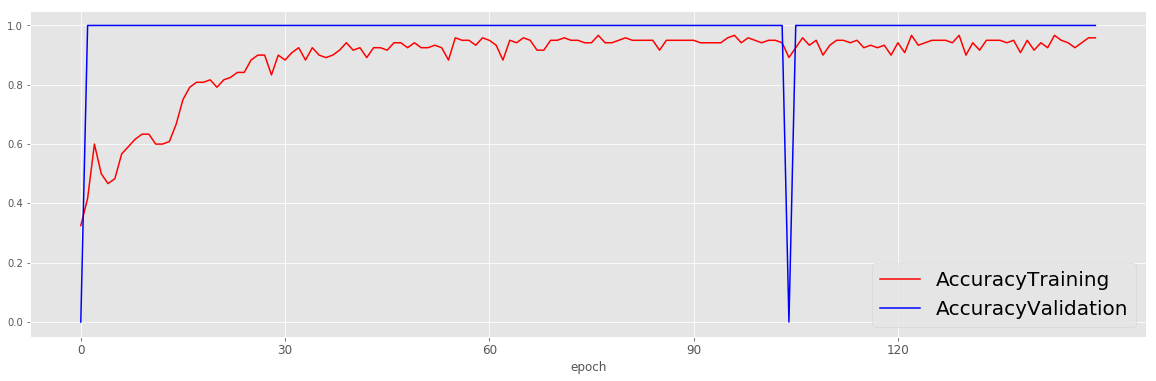

In [987]:
plt.figure(figsize = (20, 6))
plt.plot(AccuracyTraining,'r', label = 'AccuracyTraining')
plt.plot(AccuracyValidation,'b',label = 'AccuracyValidation')
plt.xticks(range(0, 150,30), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()